This implementation is taken from https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/ <br>
time taken to train using fraction module implementation: 15 minutes 36 seconds. <br>
accuracy: 93.59270609460631 %

In [416]:
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
np.random.seed(0)

In [417]:
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
a = [ Fraction(i) for i in a]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
b = [ Fraction(i) for i in b]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
c = [ Fraction(i) for i in c] 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]
y = [[Fraction(col) for col in row] for row in y]

In [418]:
def FracToFloat(a):
    s = a.shape
    if len(s)==1:
        a = [float(x) for x in a]
    else:
        a = [[float(x) for x in row] for row in a]
    return np.array(a).reshape(s)

In [419]:
def FloatToFrac(a):
    s = a.shape
    if len(s)==1:
        a = [Fraction(x) for x in a]
    else:
        a = [[Fraction(x) for x in row] for row in a]
    return np.array(a).reshape(s)

In [420]:
def ExpOfFraction(a):
    s = a.shape
    if len(s)==1:
        a = [Fraction(2.718281828459045**x) for x in a]
    else:
        a = [[Fraction(2.718281828459045**x) for x in row] for row in a]
    return np.array(a).reshape(s)

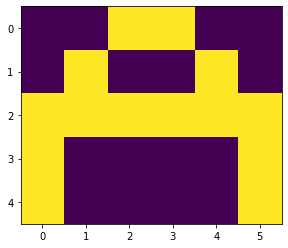

In [421]:
# visualizing the data, ploting A.
plt.imshow(FracToFloat(np.array(a).reshape(5, 6)))
plt.show()

In [422]:
# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[Fraction(0, 1), Fraction(0, 1), Fraction(1, 1), Fraction(1, 1),
        Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1),
        Fraction(0, 1), Fraction(0, 1), Fraction(1, 1), Fraction(0, 1),
        Fraction(1, 1), Fraction(1, 1), Fraction(1, 1), Fraction(1, 1),
        Fraction(1, 1), Fraction(1, 1), Fraction(1, 1), Fraction(0, 1),
        Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1),
        Fraction(1, 1), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1),
        Fraction(0, 1), Fraction(1, 1)]], dtype=object), array([[Fraction(0, 1), Fraction(1, 1), Fraction(1, 1), Fraction(1, 1),
        Fraction(1, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1),
        Fraction(0, 1), Fraction(0, 1), Fraction(1, 1), Fraction(0, 1),
        Fraction(0, 1), Fraction(1, 1), Fraction(1, 1), Fraction(1, 1),
        Fraction(1, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 1),
        Fraction(0, 1), Fraction(0, 1), Fraction(1, 1), Fraction(0, 1),
      

In [423]:
# activation function

def sigmoid(x):
	return (1/(1 + ExpOfFraction(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(FloatToFrac(np.array(l).reshape(x, y)))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	alpha = Fraction(alpha)
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	w2 = FloatToFrac(w2)
	d1 = np.multiply((w2.dot((d2.T))).T,
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	return(w1, w2)

def train(x, Y, w1, w2, alpha = Fraction(0.01), epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		clear_output(wait=True)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




In [424]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[Fraction(7944585487962021, 4503599627370496)
  Fraction(7208591417968979, 18014398509481984)
  Fraction(8815688041023915, 9007199254740992)
  Fraction(2523021444225191, 1125899906842624)
  Fraction(4205366734266093, 2251799813685248)]
 [Fraction(-4401268295648833, 4503599627370496)
  Fraction(8557635686274537, 9007199254740992)
  Fraction(-2726609067557403, 18014398509481984)
  Fraction(-7437702119601241, 72057594037927936)
  Fraction(3698342520657075, 9007199254740992)]
 [Fraction(5189716587241965, 36028797018963968)
  Fraction(6549465624053239, 4503599627370496)
  Fraction(6854818430773779, 9007199254740992)
  Fraction(547975558937401, 4503599627370496)
  Fraction(7995929158383051, 18014398509481984)]
 [Fraction(1502735576425849, 4503599627370496)
  Fraction(6728733957134651, 4503599627370496)
  Fraction(-3695802720990555, 18014398509481984)
  Fraction(1409931584496737, 4503599627370496)
  Fraction(-480813156657247, 562949953421312)]
 [Fraction(-2874410995817757, 1125899906842624)


In [425]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 100 ======== acc: 22608255287941161917821664073353656109395751116881477988727412387668492808726015326232867804852344914289185092462700923843729999185155662610705795218219859337527138680424313622975917379165963743929109534666076151287600376079463229937042027295841543453046243260637604859019306840/241560012861344754780250418196114598311619583293274761180138564779725133695264102014203085476413348176981493770468939701992010661021535707423741075484291897528299601104812676875285530900206029436231891968575498930565298232770659561017662176809478709487541532447288860255152361


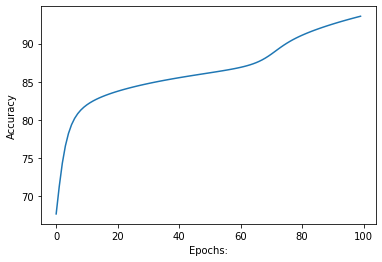

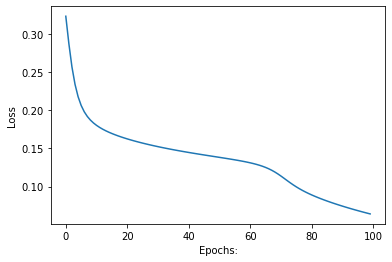

In [426]:
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [427]:
# the trained weights are
print(w1, "\n", w2)

[[Fraction(7944585487962021, 4503599627370496)
  Fraction(7208591417968979, 18014398509481984)
  Fraction(8815688041023915, 9007199254740992)
  Fraction(2523021444225191, 1125899906842624)
  Fraction(4205366734266093, 2251799813685248)]
 [Fraction(-4506677735675282029746689449039412160464701235927704756102801095033551593550949066826645790728089076570781126491320071147448504999672243936831193803774702729302033184163445844181332757137519721162891981570075771779318789072422799420411123950224989945842828988858989761067869896087164986736429638730100532367501141296128759981581511627131278955411851956510310912443880410015783537218919960670077690935743225274522004421443279735613925605596990859395462846605663876788813298904043862538717235684326830339655042191917257102347134351301530065176164630143450815081591836459864905519016849817304187014581402554679813995798675374987709291581461492573458291406018768094224146235375170187109035963956483637075820195932485195507763577763006511079241982641375259

Image is of letter B.


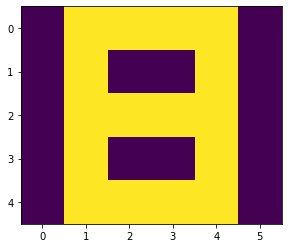

In [428]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(FracToFloat(x[1]), FracToFloat(w1), FracToFloat(w2))

In [429]:
float(max(acc))

93.59270609460631